In [1]:
from __future__ import print_function

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from collections import defaultdict, Counter

#import the rxn role assignment functionality from the rdkit contrib directory
import sys
from rdkit.Chem import RDConfig
sys.path.append(RDConfig.RDContribDir)

from RxnRoleAssignment import identifyReactants, utils
import utilsEvaluation

In [2]:
%matplotlib inline

In [3]:
def showDetailedExamples(differentSets,cls,idx):
    data = differentSets[cls][idx]
    rxn1 = AllChem.ReactionFromSmarts(str(data[1]),useSmiles=True)
    res = identifyReactants.identifyReactants(rxn1)
    print("Patent ID: ",data[-1])
    print("Reactants identified by FP-based method using rxn 1 as input:",res[0])
    print("Mapping by NameRxn")
    display(rxn1)
    print("Mapping by Indigo TK")
    rxn2 = AllChem.ReactionFromSmarts(str(data[2]),useSmiles=True)
    display(rxn2)

#### Load the data

In [4]:
rxnCls = pickle.load(file('data/rxnClasses.pickle'))

In [5]:
dataSetB = pd.read_csv('data/dataSetB.csv')

In [6]:
dataSetB.head()

,rxn_Class,patentID,rxnSmiles_Mapping_NameRxn,reactantSet_NameRxn,NameRxn_Mapping_Complete,rxnSmiles_Mapping_IndigoTK,reactantSet_IndigoTK,IndigoTK_Mapping_Complete,rxnSmiles_IndigoAutoMapperKNIME,reactantSet_IndigoAutoMapperKNIME,IndigoAutoMapperKNIME_Mapping_Complete
0,6,US05849732,C.CCCCCC.CO.O=C(OCc1ccccc1)[NH:1][CH2:2][CH2:3...,"set([3, 4])",True,C(OC([NH:11][CH2:12][CH2:13][CH2:14][CH2:15][C...,"set([0, 2])",True,C.CCCCCC.CO.[CH3:10][O:11][C:12]([C@@H:14]([NH...,"set([3, 4])",True
1,2,US20120114765A1,O[C:1](=[O:2])[c:3]1[cH:4][c:5]([N+:6](=[O:7])...,"set([0, 1])",True,[Cl:1][c:2]1[cH:3][n:4][cH:5][c:6]([Cl:20])[c:...,"set([0, 1])",True,[NH2:1][c:2]1[c:11]2[c:6]([cH:7][n:8][cH:9][cH...,"set([0, 1])",True
2,1,US08003648B2,Cl.O=[CH:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[n:7...,"set([1, 3])",True,[CH2:1]([NH:3][CH2:4][CH3:5])[CH3:2].C([BH3-])...,"set([0, 3])",True,[CH3:1][CH2:2][NH:3][CH2:4][CH3:5].[CH3:6][c:7...,"set([0, 1])",True
3,1,US09045475B2,CC(=O)O[BH-](OC(C)=O)OC(C)=O.ClCCl.O=[C:1]([CH...,"set([2, 3])",True,[nH:1]1[c:5]2[n:6][cH:7][c:8]([O:10][c:11]3[cH...,"set([0, 3])",True,CC(O[BH-](OC(=O)C)OC(=O)C)=O.[CH3:14][C:15]1([...,"set([1, 3])",True
4,2,US08188098B2,CCN(C(C)C)C(C)C.ClCCl.Cl[C:1](=[O:2])[O:3][CH:...,"set([2, 5])",True,Cl[C:2]([O:4][CH:5]1[CH2:9][CH2:8][CH2:7][CH2:...,"set([0, 2])",True,CCN(C(C)C)C(C)C.[CH3:10][CH2:11][O:12][c:13]1[...,"set([1, 4])",True


In [7]:
dataSetB.shape

(50000, 11)

In [8]:
dataSetB['reactantSet_NameRxn'] = [eval(x) for x in dataSetB['reactantSet_NameRxn']]
dataSetB['reactantSet_IndigoTK'] = [eval(x) for x in dataSetB['reactantSet_IndigoTK']]
dataSetB['reactantSet_IndigoAutoMapperKNIME'] = [eval(x) for x in dataSetB['reactantSet_IndigoAutoMapperKNIME']]

#### Evalution on data set B

First, comapre to reactants assigned by NameRxn

In [9]:
numDifferences, timings, numSol = utilsEvaluation.calcNumDifferences(dataSetB, 1, 3, 4)

done 10000
done 20000
done 30000
done 40000
done 50000


In [10]:
times=np.array(timings)
print(times.mean(), np.median(times), times.min(), times.max(), len(times))

0.00755888635159 0.00642490386963 0.0027289390564 12.1987371445 50000


[0.0, 99.90599999999999, 0.09, 0.002, 0.002]


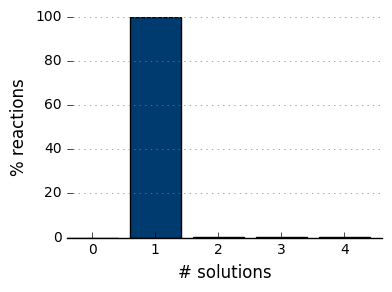

In [11]:
fig = utilsEvaluation.plotNumberSolutions(numSol)

[0.97418, 0.00526, 0.01856, 0.00184, 0.00014]


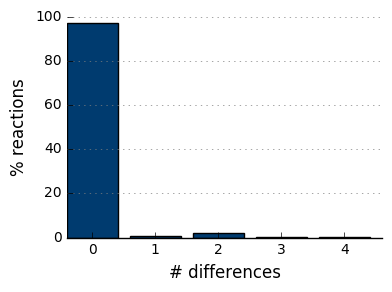

In [12]:
fig = utilsEvaluation.plotNumberDifferences(numDifferences)
# fig.savefig("dataSetB_overall_cmpToNameRxn.png", dpi=300, format='png', bbox_inches='tight')

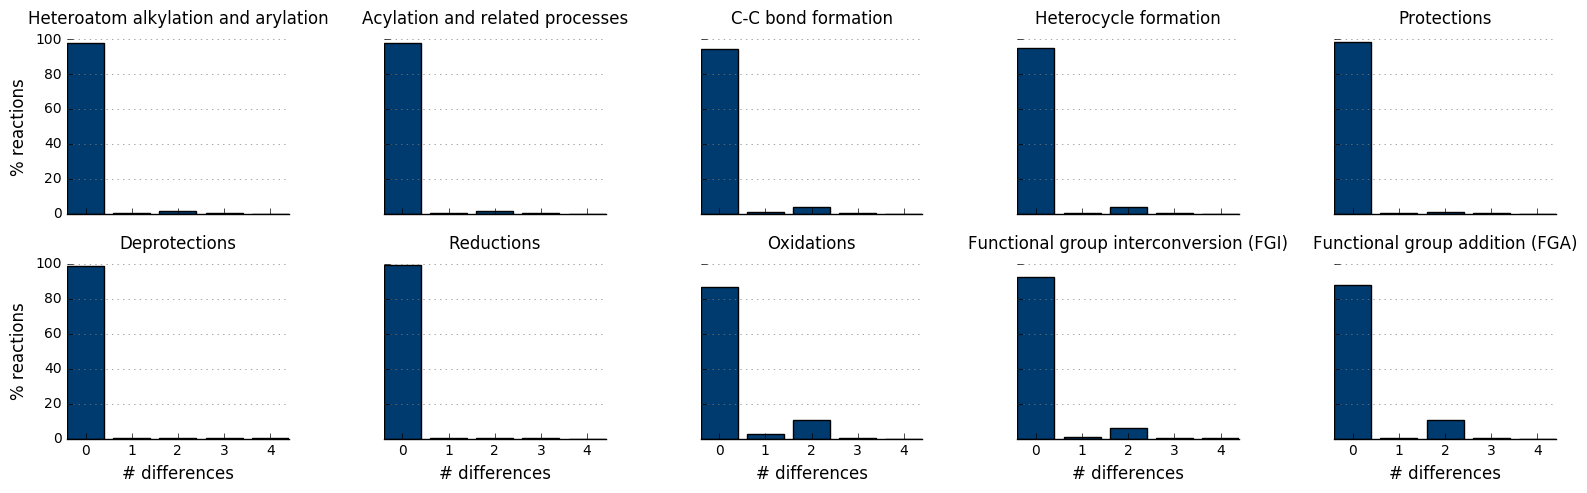

In [13]:
fig = utilsEvaluation.plotNumberDifferencesRxnCls(numDifferences,rxnCls)
# fig.savefig("dataSetB_rxnclasses_cmpToNameRxn.png", dpi=300, format='png', bbox_inches='tight')

Next, compare to the Indigo TK

In [14]:
numDifferences, timings, numSol = utilsEvaluation.calcNumDifferences(dataSetB, 1, 6, 7)

done 10000
done 20000
done 30000
done 40000
done 50000


In [15]:
times=np.array(timings)
print(times.mean(), np.median(times), times.min(), times.max(), len(times))

0.00599648323536 0.00532102584839 0.00204396247864 12.1203758717 50000


[0.0, 99.908, 0.08800000000000001, 0.002, 0.002]


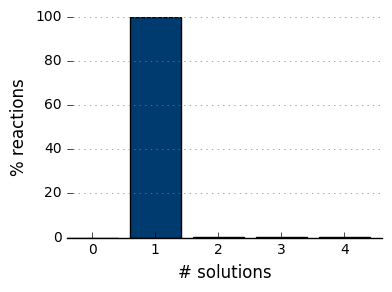

In [16]:
fig = utilsEvaluation.plotNumberSolutions(numSol)

[0.95708, 0.01012, 0.03072, 0.00172, 0.00026]


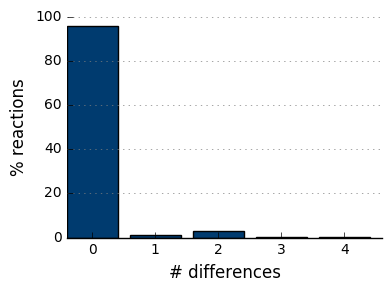

In [17]:
fig = utilsEvaluation.plotNumberDifferences(numDifferences)

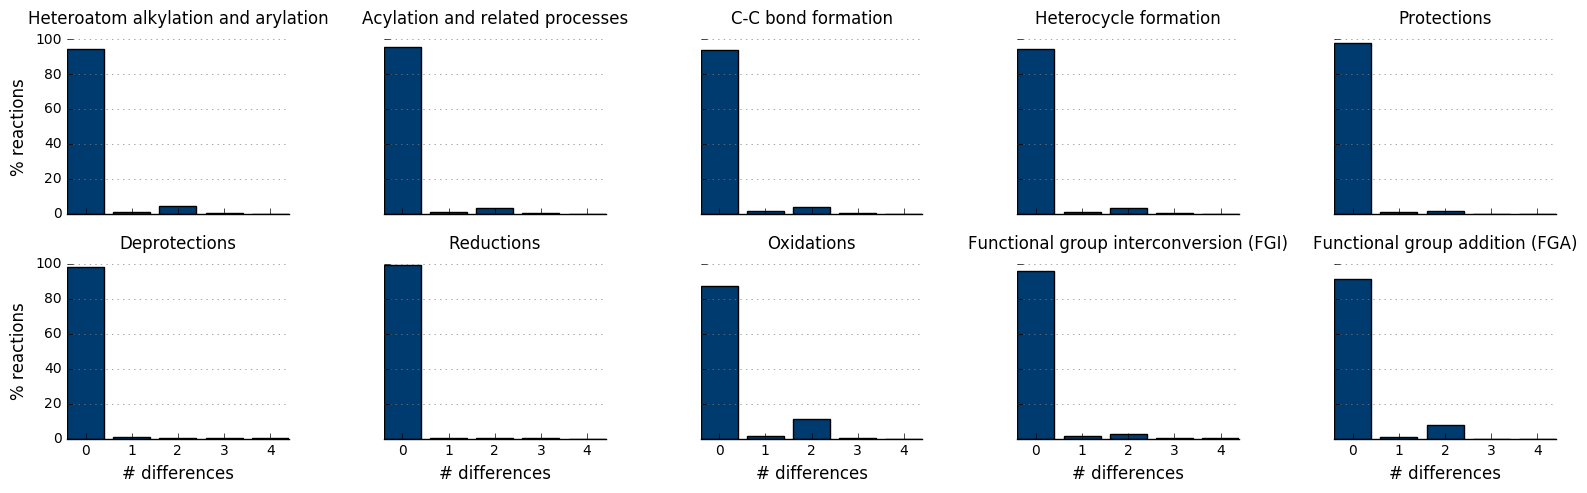

In [18]:
fig = utilsEvaluation.plotNumberDifferencesRxnCls(numDifferences,rxnCls)

Now, we "normalize" the reactions from Indigo first by moving all of the agents to the reactant side of the reaction and run the RXN assignment again 

In [19]:
numDifferences, timings, numSol = utilsEvaluation.calcNumDifferences(dataSetB, 1, 6, 7, recalcReactantSet=True)

done 10000
done 20000
done 30000
done 40000
done 50000


In [20]:
times=np.array(timings)
print(times.mean(), np.median(times), times.min(), times.max(), len(times))

0.00735195454597 0.00624299049377 0.00266480445862 12.0352189541 50000


[0.0, 99.90599999999999, 0.09, 0.002, 0.002]


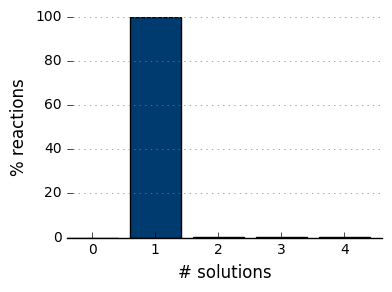

In [21]:
fig = utilsEvaluation.plotNumberSolutions(numSol)

[0.95002, 0.01126, 0.03608, 0.0022, 0.00032]


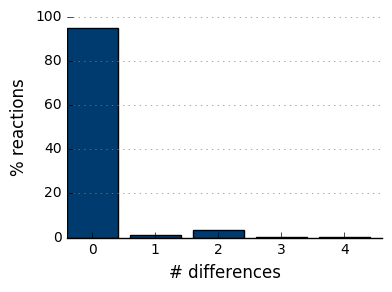

In [22]:
fig = utilsEvaluation.plotNumberDifferences(numDifferences)
fig.savefig("dataSetB_overall_cmpToIndigoTK.png", dpi=300, format='png', bbox_inches='tight')

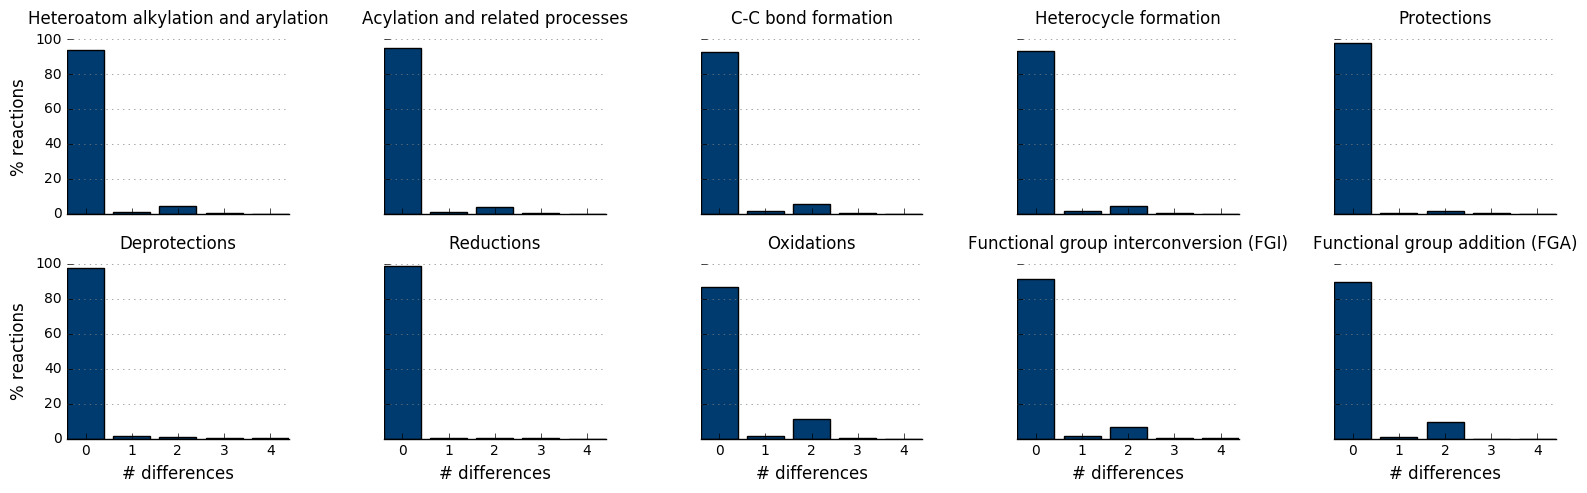

In [23]:
fig = utilsEvaluation.plotNumberDifferencesRxnCls(numDifferences,rxnCls)
fig.savefig("dataSetB_rxnclasses_cmpToIndigoTK.png", dpi=300, format='png', bbox_inches='tight')

Finally compare NameRxn and Indigo TK

In [24]:
numDifferences=defaultdict(list)
for row in dataSetB.itertuples():
    cls = row[1]
    pid = row[2]
    smi_NameRxn = row[3]
    mapping_NameRxn = row[4]
    smi_IndigoTK = row[6]
    mapping_IndigoTK = row[7]
    rxn = AllChem.ReactionFromSmarts(str(smi_NameRxn),useSmiles=True)
    AllChem.RemoveMappingNumbersFromReactions(rxn)
    foundReacts1=[]
    for i in list(mapping_NameRxn):
        mol = rxn.GetReactantTemplate(i)
        Chem.SanitizeMol(mol)
        foundReacts1.append(Chem.MolToSmiles(mol, True))
    foundReacts1 = Counter(foundReacts1)
    rxn = AllChem.ReactionFromSmarts(str(smi_IndigoTK),useSmiles=True)
    AllChem.RemoveMappingNumbersFromReactions(rxn)
    foundReacts2=[]
    for i in list(mapping_IndigoTK):
        mol = rxn.GetReactantTemplate(i)
        Chem.SanitizeMol(mol)
        foundReacts2.append(Chem.MolToSmiles(mol, True))
    foundReacts2 = Counter(foundReacts2)
    diffs = set(foundReacts1.items()).symmetric_difference(set(foundReacts2.items()))
    numDifferences[cls].append([len(diffs),smi_NameRxn,smi_IndigoTK,diffs,pid])

[0.9531, 0.00896, 0.0353, 0.0022, 0.00038]


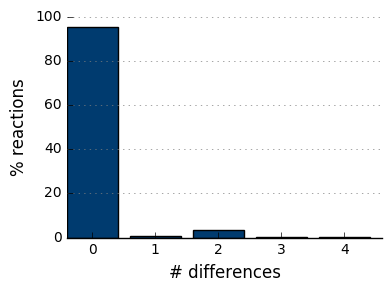

In [25]:
fig = utilsEvaluation.plotNumberDifferences(numDifferences)

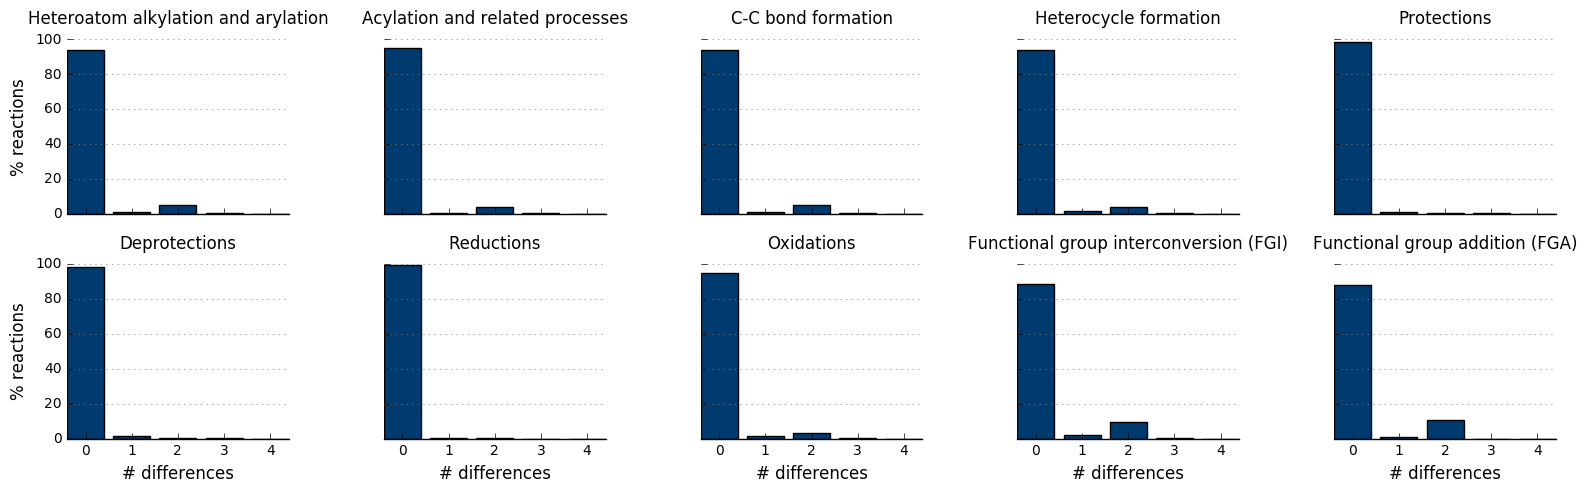

In [26]:
fig = utilsEvaluation.plotNumberDifferencesRxnCls(numDifferences,rxnCls)

#### Some detailed results

In [27]:
differentSets=defaultdict(list)
for k,l in numDifferences.items():
    for v in l:
        if v[0] > 0:
            differentSets[k].append(v)

Patent ID:  US20110218103A1
Reactants identified by FP-based method using rxn 1 as input: [set([3, 5])]
Mapping by NameRxn


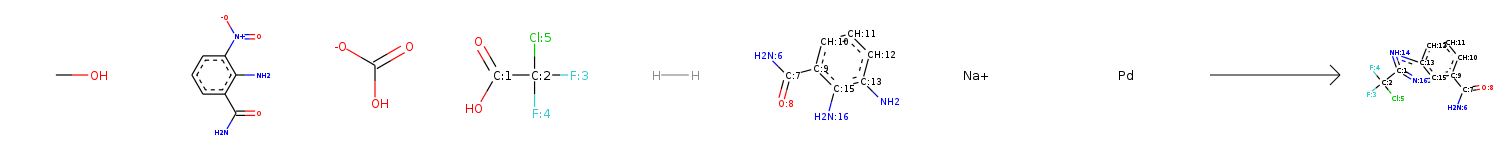

Mapping by Indigo TK


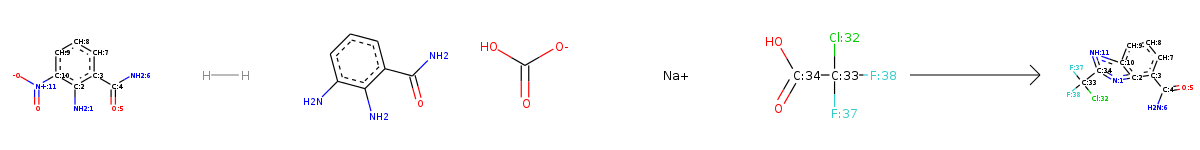

In [28]:
showDetailedExamples(differentSets,4,0)

Patent ID:  US20140135318A1
Reactants identified by FP-based method using rxn 1 as input: [set([0, 1])]
Mapping by NameRxn


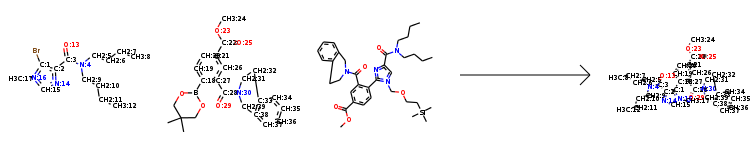

Mapping by Indigo TK


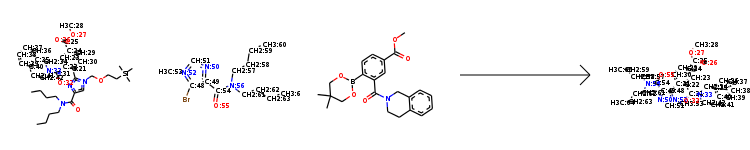

In [29]:
showDetailedExamples(differentSets,3,2)

Patent ID:  US07572791B2
Reactants identified by FP-based method using rxn 1 as input: [set([0, 7])]
Mapping by NameRxn


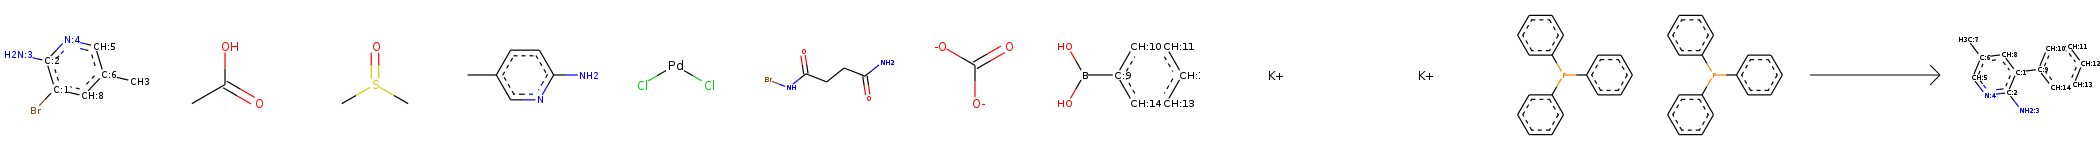

Mapping by Indigo TK


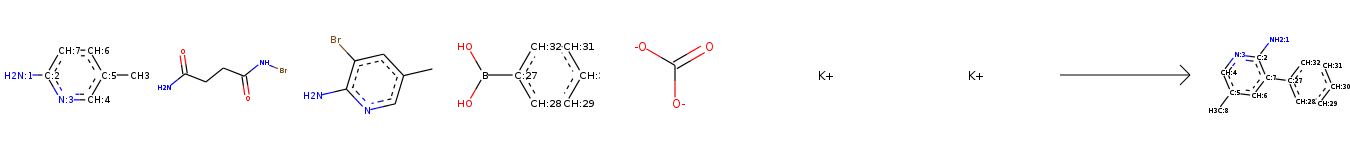

In [30]:
showDetailedExamples(differentSets,3,222)